In [1]:
%run init.ipynb
%run entropy.ipynb
%run ptr.ipynb
%run jupyterQ.ipynb

import qiskit

from qiskit import *

In [2]:
from qiskit import IBMQ

In [3]:
IBMQ.save_account('407eee087e66afb971221353c2214710f90034665067ef91fefb09e98c6c99d94ff4f4f1c14131a196c09a5d24a4368e1aaa03b0f3d99578f0b8f47071995da6', overwrite = True)

In [5]:
qiskit.IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [6]:
provider = qiskit.IBMQ.get_provider(hub='ibm-q', group='open', project='main')

In [7]:
from qiskit.tools.monitor import backend_overview, backend_monitor

In [8]:
backend_overview()

ibmq_manila                  ibmq_quito                   ibmq_belem
-----------                  ----------                   ----------
Num. Qubits:  5              Num. Qubits:  5              Num. Qubits:  5
Pending Jobs: 41             Pending Jobs: 23             Pending Jobs: 6
Least busy:   False          Least busy:   False          Least busy:   False
Operational:  True           Operational:  True           Operational:  True
Avg. T1:      165.7          Avg. T1:      76.0           Avg. T1:      91.6
Avg. T2:      54.1           Avg. T2:      103.4          Avg. T2:      97.1



ibmq_lima                    ibmq_bogota                  ibmq_santiago
---------                    -----------                  -------------
Num. Qubits:  5              Num. Qubits:  5              Num. Qubits:  5
Pending Jobs: 6              Pending Jobs: 45             Pending Jobs: 2093
Least busy:   False          Least busy:   False          Least busy:   False
Operational:  True           

In [9]:
device = provider.get_backend('ibmq_belem')

from qiskit.tools.monitor import job_monitor
qr = QuantumRegister(2)
qc = qiskit.QuantumCircuit(qr); 
qc_cal = qiskit.QuantumCircuit(qr)
from qiskit.ignis.mitigation.measurement import (complete_meas_cal, CompleteMeasFitter)
cal_circuits, state_labels = complete_meas_cal(qr = qc.qregs[0], circlabel = 'mmc')
cal_job = execute(cal_circuits, backend = device, shots = 8192, optimization_level = 0)
print(cal_job.job_id())
job_monitor(cal_job)
cal_results = cal_job.result()
meas_fitter = CompleteMeasFitter(cal_results, state_labels)
meas_filter = meas_fitter.filter

61b0cc85bd9cd2490856bcfe
Job Status: job has successfully run


In [12]:
backend_monitor(device)

ibmq_belem
Configuration
-------------
    n_qubits: 5
    operational: True
    status_msg: active
    pending_jobs: 18
    backend_version: 1.0.29
    basis_gates: ['id', 'rz', 'sx', 'x', 'cx', 'reset']
    local: False
    simulator: False
    n_uchannels: 8
    supported_features: ['q', 'o', 'b', 'j']
    pulse_num_channels: 9
    meas_map: [[0, 1, 2, 3, 4]]
    measure_esp_enabled: False
    description: 5 qubit device Belem
    qubit_channel_mapping: [['m0', 'u0', 'u1', 'd0'], ['d1', 'm1', 'u4', 'u1', 'u5', 'u3', 'u0', 'u2'], ['m2', 'd2', 'u4', 'u2'], ['u6', 'u5', 'u3', 'd3', 'm3', 'u7'], ['u6', 'd4', 'm4', 'u7']]
    discriminators: ['linear_discriminator', 'hw_centroid', 'quadratic_discriminator']
    u_channel_lo: [[{'q': 1, 'scale': (1+0j)}], [{'q': 0, 'scale': (1+0j)}], [{'q': 2, 'scale': (1+0j)}], [{'q': 3, 'scale': (1+0j)}], [{'q': 1, 'scale': (1+0j)}], [{'q': 1, 'scale': (1+0j)}], [{'q': 4, 'scale': (1+0j)}], [{'q': 3, 'scale': (1+0j)}]]
    memory: True
    allow_object_

In [11]:
####first round

qr = QuantumRegister(2); 
qc = qiskit.QuantumCircuit(qr);

from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter


qc.h(qr[0])

qst_qc = state_tomography_circuits(qc, [qr[0],qr[1]]) # defines the qcircuit to make qst
job_dev = qiskit.execute(qst_qc, backend = device, shots = 8192); # executes the qst
print(job_dev.job_id());
job_monitor(job_dev);
job_dev_mit = meas_filter.apply(job_dev.result(), method='least_squares'); # error mitigation
qstf_qc_dev = StateTomographyFitter(job_dev_mit, qst_qc); # fits the data to extract rho
rho10_measE = qstf_qc_dev.fit(method = 'lstsq');
rho0_measE = pTraceL_num(2, 2, rho10_measE)

Se = von_neumann_num(rho0_measE)


qc.u(math.pi/2, math.pi, -math.pi, qr[0])
qc.cx(qr[0],qr[1]);
qc.u(math.pi/2, 0, 0, qr[0])
   
qst_qc3 = state_tomography_circuits(qc, [qr[0],qr[1]]) # defines the qcircuit to make qst
job_dev3 = qiskit.execute(qst_qc3, backend = device, shots = 8192); # executes the qst
print(job_dev3.job_id());
job_monitor(job_dev3);    
job_dev_mit3 = meas_filter.apply(job_dev3.result(), method='least_squares'); # error mitigation
qstf_qc_dev3 = StateTomographyFitter(job_dev_mit3, qst_qc3); # fits the data to extract rho
rho10_meas3 = qstf_qc_dev3.fit(method='lstsq'); 
rho0_meas3 = pTraceL_num(2, 2, rho10_meas3); #print('Pi(rho) = ', rho0_meas)

Je = von_neumann_num(rho0_meas3)



61b0d9b7fd94263157c70b66
Job Status: job has successfully run
61b0da2dfd94265b49c70b6b
Job Status: job has successfully run


In [10]:
qr = QuantumRegister(3); 
qc = qiskit.QuantumCircuit(qr);

from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter


th_min = 0; th_max = math.pi/2; N = 8; dth = (th_max-th_min)/N; th = -dth + 10**-1; thv = np.zeros(N+1)

Ie = np.zeros(N+1)
Ve = np.zeros(N+1)

for j in range(0, N+1):
    qr = QuantumRegister(5)
    qc = qiskit.QuantumCircuit(qr)
    th += dth
    thv[j] = th 
    
    # State preparation
    th1 = th; ph1 = 0; lb1 = 0 # angles for the state preparation
    
    qc.h(qr[0])
    
    qc.u(th1, ph1, lb1, qr[1]); #print('prep = ',th1, ph1, lb1)
    qc.cz(qr[0], qr[1]);
      
    #print('meas = ',th2, ph2, lb2)
    # qstate tomography for Pi(rho)
    
    qst_qc1 = state_tomography_circuits(qc, [qr[0],qr[1]]) # defines the qcircuit to make qst
    job_dev1 = qiskit.execute(qst_qc1, backend = device, shots = 8192); # executes the qst
    print(job_dev1.job_id());
    job_monitor(job_dev1);    
    job_dev_mit1 = meas_filter.apply(job_dev1.result(), method='least_squares'); # error mitigation
    qstf_qc_dev1 = StateTomographyFitter(job_dev_mit1, qst_qc1); # fits the data to extract rho
    rho10_meas1 = qstf_qc_dev1.fit(method='lstsq'); 
    rho0_meas1 = pTraceL_num(2, 2, rho10_meas1); #print('Pi(rho) = ', rho0_meas)
   
    Ie[j] = von_neumann_num(rho0_meas1) # C with reference to sigma_x
    
    qc.u(math.pi/2, math.pi, -math.pi, qr[0])
    qc.cx(qr[0],qr[2]);
    qc.u(math.pi/2, 0, 0, qr[0])
   
    qst_qc2 = state_tomography_circuits(qc, [qr[0],qr[2]]) # defines the qcircuit to make qst
    
    job_dev2 = qiskit.execute(qst_qc2, backend = device, shots = 8192); # executes the qst
    print(job_dev2.job_id());
    job_monitor(job_dev2);    
    job_dev_mit2 = meas_filter.apply(job_dev2.result(), method='least_squares'); # error mitigation
    qstf_qc_dev2 = StateTomographyFitter(job_dev_mit2, qst_qc2); # fits the data to extract rho
    rho10_meas2 = qstf_qc_dev2.fit(method='lstsq'); 
    rho0_meas2 = pTraceL_num(2, 2, rho10_meas2); #print('Pi(rho) = ', rho0_meas)
 
    Ve[j] = von_neumann_num(rho0_meas2)
    
    

/home/marcos/anaconda3/lib/python3.7/site-packages/qiskit/ignis/verification/tomography/basis/circuits.py:468: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  prep += circuit
/home/marcos/anaconda3/lib/python3.7/site-packages/qiskit/circuit/quantumcircuit.py:942: DeprecationWarning: The QuantumCircuit.extend() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  return self.extend(rhs)
/home/marcos/anaconda3/lib/python3.7/site-packages/qiskit/ignis/verification/tomography/basis/circuits.py:478: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  circ = prep + meas
/home/marcos/ana

61b0cdd6ac813a0d4afabb90
Job Status: job has successfully run
61b0cfc9ac813af35ffabb97
Job Status: job has successfully run
61b0d023bd9cd25b7856bd0b
Job Status: job has successfully run
61b0d07caad5f32e889dcd4b
Job Status: job has successfully run
61b0d0d9f15b0317369a31ac
Job Status: job has successfully run
61b0d150fd9426652dc70b39
Job Status: job has successfully run
61b0d1bebf8803176130a786
Job Status: job has successfully run
61b0d236ac813aae7cfabba5
Job Status: job has successfully run
61b0d2aebf88034c3d30a789
Job Status: job has successfully run
61b0d329ac813a2c88fabba9
Job Status: job has successfully run
61b0d3a7bf88038b1a30a790
Job Status: job has successfully run
61b0d4aaaad5f345ec9dcd60
Job Status: job has successfully run
61b0d587aad5f3798d9dcd68
Job Status: job has successfully run
61b0d609bd9cd29da456bd28
Job Status: job has successfully run
61b0d68adcbe2316e719524a
Job Status: job has successfully run
61b0d77dac813a7559fabbc1
Job Status: job has successfully run
61b0d83a

In [13]:
Rx = Ie - Se
Rxa = Je + Ie - Ve - Se

In [105]:
Rx

array([0.10160682, 0.13001628, 0.23671495, 0.32724622, 0.36770182,
       0.44240504, 0.51961754, 0.63113951, 0.67425774, 0.61383952,
       0.59663874])

In [23]:
Rxasq = np.zeros(N+1)

for j in range(0, N+1):
    Rxasq[j] += Rxa[j]*Rxa[j]


array([0.010217  , 0.01629849, 0.0551252 , 0.10811766, 0.14012641,
       0.21419164, 0.31788483, 0.48932569, 0.62362477, 0.60185824,
       0.66785424])

In [14]:
# second round

qr = QuantumRegister(2); 
qc = qiskit.QuantumCircuit(qr);

from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter


qc.h(qr[0])

qst_qc = state_tomography_circuits(qc, [qr[0],qr[1]]) # defines the qcircuit to make qst
job_dev = qiskit.execute(qst_qc, backend = device, shots = 8192); # executes the qst
print(job_dev.job_id());
job_monitor(job_dev);
job_dev_mit = meas_filter.apply(job_dev.result(), method='least_squares'); # error mitigation
qstf_qc_dev = StateTomographyFitter(job_dev_mit, qst_qc); # fits the data to extract rho
rho10_measE = qstf_qc_dev.fit(method = 'lstsq');
rho0_measE = pTraceL_num(2, 2, rho10_measE)

Se1 = von_neumann_num(rho0_measE)

qc.u(math.pi/2, math.pi, -math.pi, qr[0])
qc.cx(qr[0],qr[1]);
qc.u(math.pi/2, 0, 0, qr[0])
    
qst_qc3 = state_tomography_circuits(qc, [qr[0],qr[1]]) # defines the qcircuit to make qst
job_dev3 = qiskit.execute(qst_qc3, backend = device, shots = 8192); # executes the qst
print(job_dev3.job_id());
job_monitor(job_dev3);    
job_dev_mit3 = meas_filter.apply(job_dev3.result(), method='least_squares'); # error mitigation
qstf_qc_dev3 = StateTomographyFitter(job_dev_mit3, qst_qc3); # fits the data to extract rho
rho10_meas3 = qstf_qc_dev3.fit(method='lstsq'); 
rho0_meas3 = pTraceL_num(2, 2, rho10_meas3); #print('Pi(rho) = ', rho0_meas)

Je1 = von_neumann_num(rho0_meas3)


61b0e3b5a880feb9f8646af9
Job Status: job has successfully run
61b0e3f2bd9cd2f9a956bd7e
Job Status: job has successfully run


In [12]:
qr = QuantumRegister(3); 
qc = qiskit.QuantumCircuit(qr);

from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter


th_min = 0; th_max = math.pi/2; N = 8; dth = (th_max-th_min)/N; th = -dth + 10**-1; thv = np.zeros(N+1)

Ie1 = np.zeros(N+1)
Ve1 = np.zeros(N+1)

for j in range(0, N+1):
    qr = QuantumRegister(5)
    qc = qiskit.QuantumCircuit(qr)
    th += dth
    thv[j] = th 
    
    # State preparation
    th1 = th; ph1 = 0; lb1 = 0 # angles for the state preparation
    
    qc.h(qr[0])
    
    qc.u(th1, ph1, lb1, qr[1]); #print('prep = ',th1, ph1, lb1)
    qc.cz(qr[0], qr[1]);
      
    #print('meas = ',th2, ph2, lb2)
    # qstate tomography for Pi(rho)
    
    qst_qc1 = state_tomography_circuits(qc, [qr[0],qr[1]]) # defines the qcircuit to make qst
    job_dev1 = qiskit.execute(qst_qc1, backend = device, shots = 8192); # executes the qst
    print(job_dev1.job_id());
    job_monitor(job_dev1);    
    job_dev_mit1 = meas_filter.apply(job_dev1.result(), method='least_squares'); # error mitigation
    qstf_qc_dev1 = StateTomographyFitter(job_dev_mit1, qst_qc1); # fits the data to extract rho
    rho10_meas1 = qstf_qc_dev1.fit(method='lstsq'); 
    rho0_meas1 = pTraceL_num(2, 2, rho10_meas1); #print('Pi(rho) = ', rho0_meas)
   
    Ie1[j] = von_neumann_num(rho0_meas1) # C with reference to sigma_x
    
    
    qc.u(math.pi/2, math.pi, -math.pi, qr[0])
    qc.cx(qr[0],qr[2]);
    qc.u(math.pi/2, 0, 0, qr[0])
   
    qst_qc2 = state_tomography_circuits(qc, [qr[0],qr[2]]) # defines the qcircuit to make qst
    
    job_dev2 = qiskit.execute(qst_qc2, backend = device, shots = 8192); # executes the qst
    print(job_dev2.job_id());
    job_monitor(job_dev2);    
    job_dev_mit2 = meas_filter.apply(job_dev2.result(), method='least_squares'); # error mitigation
    qstf_qc_dev2 = StateTomographyFitter(job_dev_mit2, qst_qc2); # fits the data to extract rho
    rho10_meas2 = qstf_qc_dev2.fit(method='lstsq'); 
    rho0_meas2 = pTraceL_num(2, 2, rho10_meas2); #print('Pi(rho) = ', rho0_meas)
 
    Ve1[j] = von_neumann_num(rho0_meas2)
    
    

61b0dafbf15b032d5b9a31ea
Job Status: job has successfully run
61b0dc8fd73deab87d374660
Job Status: job has successfully run
61b0dd1bbf88036f1730a7c3
Job Status: job has successfully run
61b0dd9dac813ab254fabbe4
Job Status: job has successfully run
61b0ddf92e6f45b6eb9c8d97
Job Status: job has successfully run
61b0de51dcbe2335f519527f
Job Status: job has successfully run
61b0deacd73dea08e4374670
Job Status: job has successfully run
61b0df57bd9cd2074556bd62
Job Status: job has successfully run
61b0dfbadcbe237113195287
Job Status: job has successfully run
61b0e01ebd9cd2647656bd69
Job Status: job has successfully run
61b0e081bf88035b8e30a7d3
Job Status: job has successfully run
61b0e0dbd73dea610337467e
Job Status: job has successfully run
61b0e12cac813ad1d7fabbf9
Job Status: job has successfully run
61b0e17abd9cd2846956bd73
Job Status: job has successfully run
61b0e1cad73dea323e374687
Job Status: job has successfully run
61b0e224aad5f372de9dcdb3
Job Status: job has successfully run
61b0e276

In [15]:
Rx1 = Ie1 - Se1
Rxa1 = Je1 + Ie1 - Ve1 - Se1

In [16]:
Rx

array([0.19220124, 0.26362274, 0.38075059, 0.55325599, 0.691768  ,
       0.82433307, 0.92698206, 0.97461711, 0.98354515])

In [17]:
Rx1

array([0.18166618, 0.24976486, 0.37014345, 0.53966615, 0.69086055,
       0.81849902, 0.92378677, 0.97479034, 0.98028071])

In [47]:
Rxa2

array([0.13473568, 0.17395395, 0.21898175, 0.31169146, 0.39244085,
       0.48585333, 0.57337698, 0.66257514, 0.74579984, 0.819175  ,
       0.88359934])

In [19]:
# third round
qr = QuantumRegister(2); 
qc = qiskit.QuantumCircuit(qr);

from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter


qc.h(qr[0])

qst_qc = state_tomography_circuits(qc, [qr[0],qr[1]]) # defines the qcircuit to make qst
job_dev = qiskit.execute(qst_qc, backend = device, shots = 8192); # executes the qst
print(job_dev.job_id());
job_monitor(job_dev);
job_dev_mit = meas_filter.apply(job_dev.result(), method='least_squares'); # error mitigation
qstf_qc_dev = StateTomographyFitter(job_dev_mit, qst_qc); # fits the data to extract rho
rho10_measE = qstf_qc_dev.fit(method = 'lstsq');
rho0_measE = pTraceL_num(2, 2, rho10_measE)

Se2 = von_neumann_num(rho0_measE)


qc.u(math.pi/2, math.pi, -math.pi, qr[0])
qc.cx(qr[0],qr[1]);
qc.u(math.pi/2, 0, 0, qr[0])
    
qst_qc3 = state_tomography_circuits(qc, [qr[0],qr[1]]) # defines the qcircuit to make qst
job_dev3 = qiskit.execute(qst_qc3, backend = device, shots = 8192); # executes the qst
print(job_dev3.job_id());
job_monitor(job_dev3);    
job_dev_mit3 = meas_filter.apply(job_dev3.result(), method='least_squares'); # error mitigation
qstf_qc_dev3 = StateTomographyFitter(job_dev_mit3, qst_qc3); # fits the data to extract rho
rho10_meas3 = qstf_qc_dev3.fit(method='lstsq'); 
rho0_meas3 = pTraceL_num(2, 2, rho10_meas3); #print('Pi(rho) = ', rho0_meas)

Je2 = von_neumann_num(rho0_meas3)


61b0ec8b0745b25bdb7a8a2e
Job Status: job has successfully run
61b0ecdbd73deade543746e3
Job Status: job has successfully run


In [18]:
qr = QuantumRegister(3); 
qc = qiskit.QuantumCircuit(qr);

from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter


th_min = 0; th_max = math.pi/2; N = 8; dth = (th_max-th_min)/N; th = -dth + 10**-1; thv = np.zeros(N+1)

Ie2 = np.zeros(N+1)
Ve2 = np.zeros(N+1)

for j in range(0, N+1):
    qr = QuantumRegister(5)
    qc = qiskit.QuantumCircuit(qr)
    th += dth
    thv[j] = th 
    
    # State preparation
    th1 = th; ph1 = 0; lb1 = 0 # angles for the state preparation
    
    qc.h(qr[0])
    
    qc.u(th1, ph1, lb1, qr[1]); #print('prep = ',th1, ph1, lb1)
    qc.cz(qr[0], qr[1]);
      
    #print('meas = ',th2, ph2, lb2)
    # qstate tomography for Pi(rho)
    
    qst_qc1 = state_tomography_circuits(qc, [qr[0],qr[1]]) # defines the qcircuit to make qst
    job_dev1 = qiskit.execute(qst_qc1, backend = device, shots = 8192); # executes the qst
    print(job_dev1.job_id());
    job_monitor(job_dev1);    
    job_dev_mit1 = meas_filter.apply(job_dev1.result(), method='least_squares'); # error mitigation
    qstf_qc_dev1 = StateTomographyFitter(job_dev_mit1, qst_qc1); # fits the data to extract rho
    rho10_meas1 = qstf_qc_dev1.fit(method='lstsq'); 
    rho0_meas1 = pTraceL_num(2, 2, rho10_meas1); #print('Pi(rho) = ', rho0_meas)
   
    Ie2[j] = von_neumann_num(rho0_meas1) # C with reference to sigma_x
    
    
    qc.u(math.pi/2, math.pi, -math.pi, qr[0])
    qc.cx(qr[0],qr[2]);
    qc.u(math.pi/2, 0, 0, qr[0])
   
    qst_qc2 = state_tomography_circuits(qc, [qr[0],qr[2]]) # defines the qcircuit to make qst
    
    job_dev2 = qiskit.execute(qst_qc2, backend = device, shots = 8192); # executes the qst
    print(job_dev2.job_id());
    job_monitor(job_dev2);    
    job_dev_mit2 = meas_filter.apply(job_dev2.result(), method='least_squares'); # error mitigation
    qstf_qc_dev2 = StateTomographyFitter(job_dev_mit2, qst_qc2); # fits the data to extract rho
    rho10_meas2 = qstf_qc_dev2.fit(method='lstsq'); 
    rho0_meas2 = pTraceL_num(2, 2, rho10_meas2); #print('Pi(rho) = ', rho0_meas)
 
    Ve2[j] = von_neumann_num(rho0_meas2)


61b0e5e42e6f4557b99c8dda
Job Status: job has successfully run
61b0e622f15b03f2df9a3241
Job Status: job has successfully run
61b0e672bf8803858730a809
Job Status: job has successfully run
61b0e6c3bf8803223a30a80c
Job Status: job has successfully run
61b0e711ac813a7537fabc41
Job Status: job has successfully run
61b0e762dcbe23159d1952de
Job Status: job has successfully run
61b0e7b3d73dea8b583746be
Job Status: job has successfully run
61b0e801dcbe2382e41952e1
Job Status: job has successfully run
61b0e85df15b039f069a3256
Job Status: job has successfully run
61b0e8abdcbe23631b1952e5
Job Status: job has successfully run
61b0e8fbf15b0366209a325e
Job Status: job has successfully run
61b0e9692775eb646753f0af
Job Status: job has successfully run
61b0e9baaad5f3d0079dce02
Job Status: job has successfully run
61b0ea092775ebc77b53f0b1
Job Status: job has successfully run
61b0ea632775eb1b2253f0b5
Job Status: job has successfully run
61b0eab4a880fefc28646b4a
Job Status: job has successfully run
61b0eb04

In [20]:
Rx2 = Ie2 - Se2
Rxa2 = Je2 + Ie2 - Ve2 - Se2

In [23]:
# fourth round
qr = QuantumRegister(2); 
qc = qiskit.QuantumCircuit(qr);

from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter


qc.h(qr[0])

qst_qc = state_tomography_circuits(qc, [qr[0],qr[1]]) # defines the qcircuit to make qst
job_dev = qiskit.execute(qst_qc, backend = device, shots = 8192); # executes the qst
print(job_dev.job_id());
job_monitor(job_dev);
job_dev_mit = meas_filter.apply(job_dev.result(), method='least_squares'); # error mitigation
qstf_qc_dev = StateTomographyFitter(job_dev_mit, qst_qc); # fits the data to extract rho
rho10_measE = qstf_qc_dev.fit(method = 'lstsq');
rho0_measE = pTraceL_num(2, 2, rho10_measE)

Se3 = von_neumann_num(rho0_measE)


qc.u(math.pi/2, math.pi, -math.pi, qr[0])
qc.cx(qr[0],qr[1]);
qc.u(math.pi/2, 0, 0, qr[0])
    
qst_qc3 = state_tomography_circuits(qc, [qr[0],qr[1]]) # defines the qcircuit to make qst
job_dev3 = qiskit.execute(qst_qc3, backend = device, shots = 8192); # executes the qst
print(job_dev3.job_id());
job_monitor(job_dev3);    
job_dev_mit3 = meas_filter.apply(job_dev3.result(), method='least_squares'); # error mitigation
qstf_qc_dev3 = StateTomographyFitter(job_dev_mit3, qst_qc3); # fits the data to extract rho
rho10_meas3 = qstf_qc_dev3.fit(method='lstsq'); 
rho0_meas3 = pTraceL_num(2, 2, rho10_meas3); #print('Pi(rho) = ', rho0_meas)

Je3 = von_neumann_num(rho0_meas3)


61b0f9930745b221e47a8a9d
Job Status: job has successfully run
61b0f9dc0745b29f287a8aa1
Job Status: job has successfully run


In [22]:
qr = QuantumRegister(3); 
qc = qiskit.QuantumCircuit(qr);

from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter


th_min = 0; th_max = math.pi/2; N = 8; dth = (th_max-th_min)/N; th = -dth + 10**-1; thv = np.zeros(N+1)

Ie3 = np.zeros(N+1)
Ve3 = np.zeros(N+1)

for j in range(0, N+1):
    qr = QuantumRegister(5)
    qc = qiskit.QuantumCircuit(qr)
    th += dth
    thv[j] = th 
    
    # State preparation
    th1 = th; ph1 = 0; lb1 = 0 # angles for the state preparation
    
    qc.h(qr[0])
    
    qc.u(th1, ph1, lb1, qr[1]); #print('prep = ',th1, ph1, lb1)
    qc.cz(qr[0], qr[1]);
      
    #print('meas = ',th2, ph2, lb2)
    # qstate tomography for Pi(rho)
    
    qst_qc1 = state_tomography_circuits(qc, [qr[0],qr[1]]) # defines the qcircuit to make qst
    job_dev1 = qiskit.execute(qst_qc1, backend = device, shots = 8192); # executes the qst
    print(job_dev1.job_id());
    job_monitor(job_dev1);    
    job_dev_mit1 = meas_filter.apply(job_dev1.result(), method='least_squares'); # error mitigation
    qstf_qc_dev1 = StateTomographyFitter(job_dev_mit1, qst_qc1); # fits the data to extract rho
    rho10_meas1 = qstf_qc_dev1.fit(method='lstsq'); 
    rho0_meas1 = pTraceL_num(2, 2, rho10_meas1); #print('Pi(rho) = ', rho0_meas)
   
    Ie3[j] = von_neumann_num(rho0_meas1) # C with reference to sigma_x
    
    
    qc.u(math.pi/2, math.pi, -math.pi, qr[0])
    qc.cx(qr[0],qr[2]);
    qc.u(math.pi/2, 0, 0, qr[0])
  
    qst_qc2 = state_tomography_circuits(qc, [qr[0],qr[2]]) # defines the qcircuit to make qst
    
    job_dev2 = qiskit.execute(qst_qc2, backend = device, shots = 8192); # executes the qst
    print(job_dev2.job_id());
    job_monitor(job_dev2);    
    job_dev_mit2 = meas_filter.apply(job_dev2.result(), method='least_squares'); # error mitigation
    qstf_qc_dev2 = StateTomographyFitter(job_dev_mit2, qst_qc2); # fits the data to extract rho
    rho10_meas2 = qstf_qc_dev2.fit(method='lstsq'); 
    rho0_meas2 = pTraceL_num(2, 2, rho10_meas2); #print('Pi(rho) = ', rho0_meas)
 
    Ve3[j] = von_neumann_num(rho0_meas2)


61b0f3a8de9f24236f711f04
Job Status: job has successfully run
61b0f409ec014d6617c8a734
Job Status: job has successfully run
61b0f45bec014dc7f9c8a738
Job Status: job has successfully run
61b0f4aa78707c810af61b95
Job Status: job has successfully run
61b0f4f90745b25d217a8a7c
Job Status: job has successfully run
61b0f54a78707c2ab1f61b99
Job Status: job has successfully run
61b0f5a5dccd005d509fcc29
Job Status: job has successfully run
61b0f5ffdccd0004429fcc2b
Job Status: job has successfully run
61b0f644de9f241e3d711f25
Job Status: job has successfully run
61b0f695dc3b19532b792de0
Job Status: job has successfully run
61b0f6e401bcf90c3dba73c5
Job Status: job has successfully run
61b0f73d78707cccb3f61ba4
Job Status: job has successfully run
61b0f78f59a04b168e95903e
Job Status: job has successfully run
61b0f7e8de9f2429d4711f31
Job Status: job has successfully run
61b0f83759a04b3f9f959047
Job Status: job has successfully run
61b0f893db63d7cf0aaee806
Job Status: job has successfully run
61b0f8e2

In [24]:
Rx3 = Ie3 - Se3
Rxa3 = Je3 + Ie3 - Ve3 - Se3



In [25]:
import numpy as np


Rxav = (Rx + Rx1+ Rx2+ Rx3)/4
Rxaav = (Rxa + Rxa1 + Rxa2 + Rxa3)/4

A = (Rx**2 + Rx1**2 + Rx2**2 + Rx3**2)
B = (Rxa**2 + Rxa1**2 + Rxa2**2 + Rxa3**2)


VarRx = np.sqrt(0.25*A - Rxav**2)
VarRa = np.sqrt(0.25*B - Rxaav**2)





In [26]:
VarRx

array([0.01529513, 0.00780722, 0.00419635, 0.00575349, 0.00165224,
       0.00532847, 0.00278187, 0.00123898, 0.00156086])

In [34]:
qr = QuantumRegister(5); 
qc = qiskit.QuantumCircuit(qr);

from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter


th_min = 0; th_max = math.pi/2; N = 8; dth = (th_max-th_min)/N; th = -dth + 10**-1; thv = np.zeros(N+1)

I = np.zeros(N+1)
V = np.zeros(N+1)
J = np.zeros(N+1)
#S = np.zeros(N+1)

for j in range(0, N+1):
    qr = QuantumRegister(5)
    qc = qiskit.QuantumCircuit(qr)
    th += dth
    thv[j] = th 
    
    # State preparation
    th1 = th; ph1 = 0; lb1 = 0 # angles for the state preparation
    
    qc.h(qr[0])
       
    qc.u(th1, ph1, lb1, qr[1]); #print('prep = ',th1, ph1, lb1)
    qc.cz(qr[0], qr[1]);
        
    #print('meas = ',th2, ph2, lb2)
    # qstate tomography for Pi(rho)
    qst_qc = state_tomography_circuits(qc, [qr[0],qr[1]]) # defines the qcircuit to make qst
    
    job = qiskit.execute(qst_qc, Aer.get_backend('qasm_simulator'), shots = 8192) # executes the qst
    qstf_qc = StateTomographyFitter(job.result(), qst_qc) # fits the data to extract rho
    rho10_meas = qstf_qc.fit(method='lstsq'); 
    rho0_meas = pTraceL_num(2, 2, rho10_meas); #print('Pi(rho) = ', rho0_meas)
    
    I[j] = von_neumann_num(rho0_meas) # C with reference to sigma_x
    
    
    qc.u(math.pi/2, math.pi, -math.pi, qr[0])
    qc.cx(qr[0],qr[2]);
    qc.u(math.pi/2, 0, 0, qr[0])
    
    qst_qc1 = state_tomography_circuits(qc, [qr[0],qr[2]]) # defines the qcircuit to make qst
    
    job = qiskit.execute(qst_qc1, Aer.get_backend('qasm_simulator'), shots = 8192) # executes the qst
    qstf_qc1 = StateTomographyFitter(job.result(), qst_qc1) # fits the data to extract rho
    rho10_meas1 = qstf_qc1.fit(method='lstsq'); 
    rho0_meas1 = pTraceL_num(2, 2, rho10_meas1); #print('Pi(rho) = ', rho0_meas)

    V[j] = von_neumann_num(rho0_meas1)
    
    qc.h(qr[3])
    
#    qst_qc4 = state_tomography_circuits(qc, [qr[3],qr[4]]) # defines the qcircuit to make qst
    
#    job = qiskit.execute(qst_qc4, Aer.get_backend('qasm_simulator'), shots = 8192) # executes the qst
#    qstf_qc4 = StateTomographyFitter(job.result(), qst_qc4) # fits the data to extract rho
#    rho10_meas4 = qstf_qc4.fit(method='lstsq'); 
#    rho0_meas4 = pTraceL_num(2, 2, rho10_meas4); #print('Pi(rho) = ', rho0_meas)

#    S[j] = von_neumann_num(rho0_meas4)
    
    
    qc.u(math.pi/2, math.pi, -math.pi, qr[3])
    qc.cx(qr[3],qr[4]);
    qc.u(math.pi/2, 0, 0, qr[3])
    
    qst_qc2 = state_tomography_circuits(qc, [qr[3],qr[4]]) # defines the qcircuit to make qst
    
    job = qiskit.execute(qst_qc2, Aer.get_backend('qasm_simulator'), shots = 8192) # executes the qst
    qstf_qc2 = StateTomographyFitter(job.result(), qst_qc2) # fits the data to extract rho
    rho10_meas2 = qstf_qc2.fit(method='lstsq'); 
    rho0_meas2 = pTraceL_num(2, 2, rho10_meas2); #print('Pi(rho) = ', rho0_meas)

    J[j] = von_neumann_num(rho0_meas2)


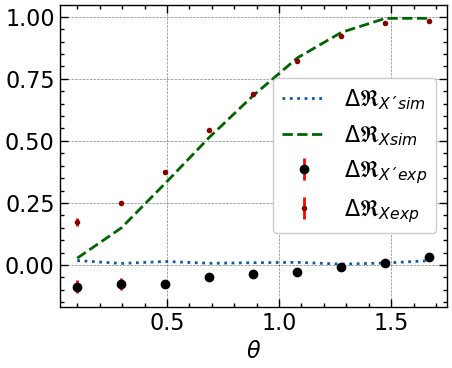

In [36]:
import matplotlib
plt.style.use(['science', 'notebook', 'grid'])    
  
    
matplotlib.rcParams.update({'font.size':12}); plt.figure(figsize = (5,4), dpi = 100)
#plt.plot(thv, Pv, 'o--',label = r'$P_{vn}^{\sigma_{z}}(\rho_{sim})$')
plt.plot(thv, J + I - V, ':', label = r'$\Delta \mathfrak{R}_{X´sim}$')
plt.plot(thv, I, '--', color = "darkgreen" ,label = r'$\Delta \mathfrak{R}_{X sim}$')
plt.errorbar(thv, Rxaav, yerr = VarRa, color = "black" ,fmt = 'o', ecolor = 'red', label = r'$\Delta \mathfrak{R}_{X´exp}$')
plt.errorbar(thv, Rxav, yerr = VarRx, color = "darkred" ,fmt = '.', ecolor = 'red', label =  r'$\Delta \mathfrak{R}_{X exp}$'); 
#plt.plot(thv, Je + Ie - Ve - Se, 'o', label = r'$\Delta \mathfrak{R}_{X´exp}$')
#Plt.plot(thv, Ie - Se, '^', label = r'$\Delta \mathfrak{R}_{X exp}$')

#plt.plot(thv, IE, 'rx:', label = r'$\mathcal{R}_E$')

#plt.plot(thv, PvE, ':', label = r'$P_{vn}^{\sigma_{z}}(\rho_{exp})$')
plt.xlabel(r'$\theta$'); 
    #plt.legend(loc = 'center right', bbox_to_anchor=(th_max-0.05, 0.5))
plt.legend(loc = 'best')
plt.savefig('varexp.pdf', format='pdf',dpi = 1200, bbox_inches='tight')
plt.show()